<a href="https://colab.research.google.com/github/doronin99/eda_shoppers/blob/pipeline/EDA_shoppers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Libraries and data importing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/doronin99/eda_shoppers/main/online_shoppers_intention.csv')

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


C

## Describing the data

* `Administrative`, `Administrative Duration`, `Informational`, `Informational Duration`, `Product Related` and `Product Related Duration` represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories.
* `BounceRates` - refers to the percentage of visitors who enter the site from that page and then leave without triggering any other requests to the analytics server during that session.
* `ExitRates` - feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session.
* `PageValues` - represents the average value for a web page that a user visited before completing an e-commerce transaction.
* `SpecialDay` - indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day).
* `Month` - month of the year.
* `OperatingSystems` - operating system.
* `Browser` - browser.
* `Region` - region.
* `TrafficType` - traffic type.
* `VisitorType` - returning or new visitor.
* `Weekend` - boolean value indicating whether the date of the visit is weekend.
* `Revenue` - target value (class label)

In [4]:
df.shape

(12330, 18)

In [5]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12131.000000,12330.000000,11839.000000,12330.000000,12231.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.724502,31.731468,1190.534914,0.022191,0.043021,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,141.655684,44.475503,1908.447706,0.048488,0.048562,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,183.854167,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,597.625000,0.003112,0.025141,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1462.554562,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [6]:
df.describe(include='object')

,Month,VisitorType
count,12330,12330
unique,11,3
top,May,Returning_Visitor
freq,3348,10551


## Dropping dupclicates and inplacing missing values

In [7]:
df.duplicated().sum()

109

In [8]:
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True, drop=True)
df.shape

(12221, 18)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12221 entries, 0 to 12220
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12221 non-null  int64  
 1   Administrative_Duration  12221 non-null  float64
 2   Informational            12221 non-null  int64  
 3   Informational_Duration   12022 non-null  float64
 4   ProductRelated           12221 non-null  int64  
 5   ProductRelated_Duration  11732 non-null  float64
 6   BounceRates              12221 non-null  float64
 7   ExitRates                12122 non-null  float64
 8   PageValues               12221 non-null  float64
 9   SpecialDay               12221 non-null  float64
 10  Month                    12221 non-null  object 
 11  OperatingSystems         12221 non-null  int64  
 12  Browser                  12221 non-null  int64  
 13  Region                   12221 non-null  int64  
 14  TrafficType           

There are three columns with null values: `Informational_Duration`, `ProductRelated_Duration`, `ExitRates`

In [10]:
round(df['Informational_Duration'].isnull().sum() / len(df) * 100, 1)

1.6

In [11]:
df['Informational_Duration'].value_counts()

0.00      9659
9.00        32
7.00        25
6.00        25
10.00       25
          ... 
43.20        1
66.40        1
246.80       1
274.00       1
211.25       1
Name: Informational_Duration, Length: 1241, dtype: int64

`Informational_Duration`'s nulls replacing with zeros

In [12]:
df['Informational_Duration'].fillna(0, inplace=True)

In [13]:
round(df['ProductRelated_Duration'].isnull().sum() / len(df) * 100, 1)

4.0

In [14]:
df['ProductRelated_Duration'].value_counts()

0.000000       615
17.000000       19
11.000000       17
15.000000       16
8.000000        16
              ... 
3141.258333      1
491.000000       1
1192.226190      1
1119.716667      1
346.000000       1
Name: ProductRelated_Duration, Length: 9210, dtype: int64

`ProductRelated_Duration`'s nulls replacing with median

In [15]:
df['ProductRelated_Duration'].fillna(df['ProductRelated_Duration'].median(), inplace=True)

In [16]:
round(df['ExitRates'].isnull().sum() / len(df) * 100, 1)

0.8

In [17]:
df['ExitRates'].value_counts()

0.200000    595
0.100000    331
0.050000    327
0.033333    289
0.066667    267
           ... 
0.051269      1
0.011562      1
0.021816      1
0.015787      1
0.029031      1
Name: ExitRates, Length: 4746, dtype: int64

`ExitRates`'s nulls replacing with mean

In [18]:
df['ExitRates'].fillna(df['ExitRates'].mean(), inplace=True)

## Feature analysis

#### Administrative, Administrative Duration, Informational, Informational Duration, Product Related and Product Related Duration

In [19]:
sts_features = ["Administrative",
               "Administrative_Duration",
               "Informational",
               "Informational_Duration",
               "ProductRelated",
               "ProductRelated_Duration"] # sessions time spent

array([[<Axes: title={'center': 'Administrative'}>,
        <Axes: title={'center': 'Administrative_Duration'}>],
       [<Axes: title={'center': 'Informational'}>,
        <Axes: title={'center': 'Informational_Duration'}>],
       [<Axes: title={'center': 'ProductRelated'}>,
        <Axes: title={'center': 'ProductRelated_Duration'}>]],
      dtype=object)

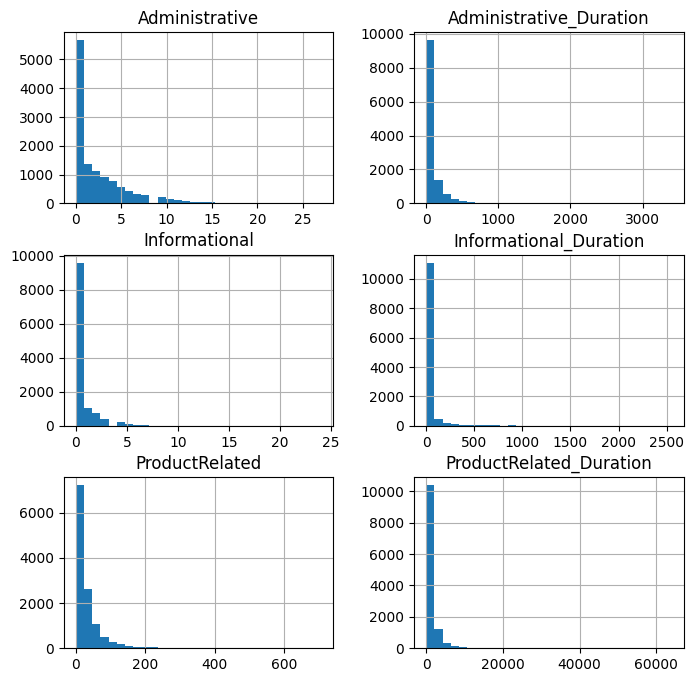

In [20]:
df.hist(column = sts_features, bins=30, figsize=(8,8))

All the features are strongly biased to zero.

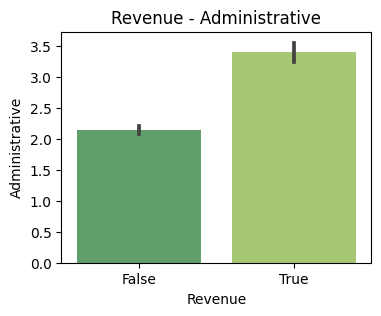

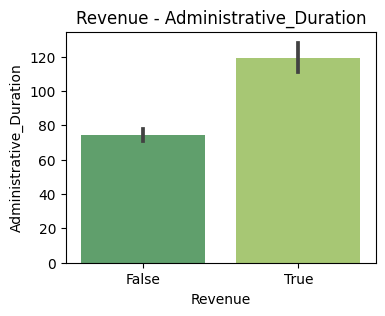

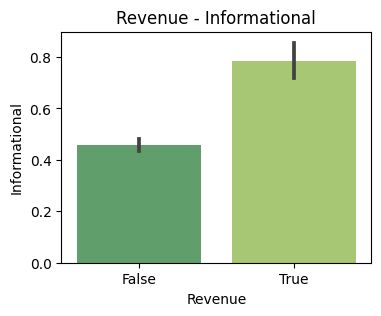

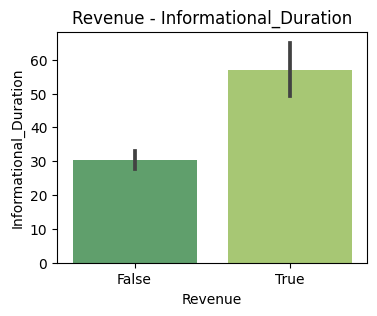

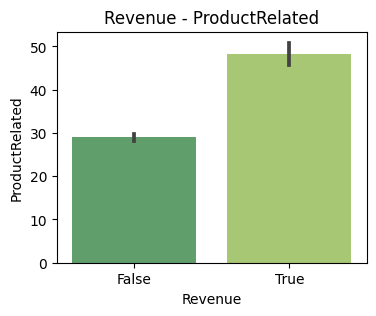

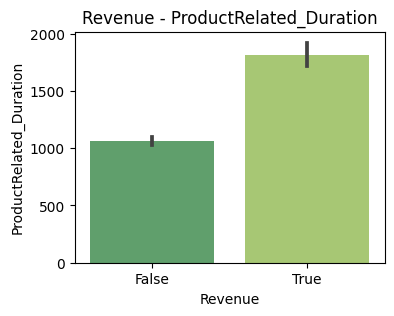

In [21]:
for feature in sts_features:
  plt.figure(figsize=(4,3))
  sns.barplot(x='Revenue', y=feature, data = df, palette='summer')
  plt.title(f'Revenue - {feature}')
  plt.show()

**The mean for each attribute is higher for those cases where the purchase was made (which seems logical)**

#### The metrics measured by "Google Analytics"

In [22]:
ga_features = ["BounceRates", "ExitRates", "PageValues"]

array([[<Axes: title={'center': 'BounceRates'}>,
        <Axes: title={'center': 'ExitRates'}>],
       [<Axes: title={'center': 'PageValues'}>, <Axes: >]], dtype=object)

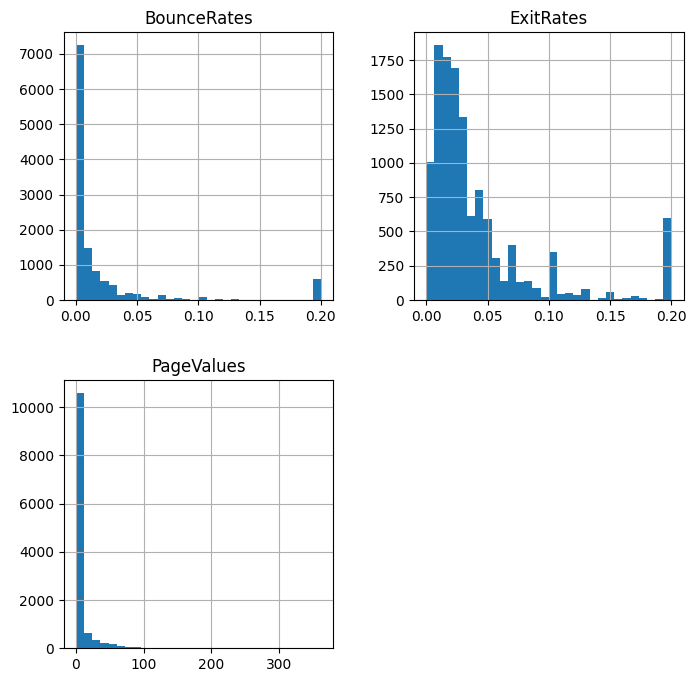

In [23]:
df.hist(column = ga_features, bins=30, figsize=(8,8))

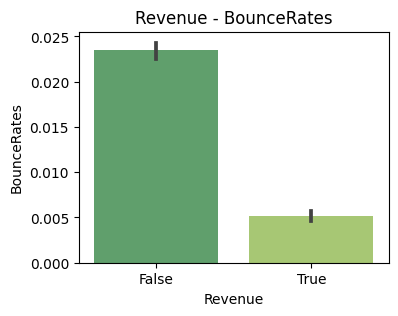

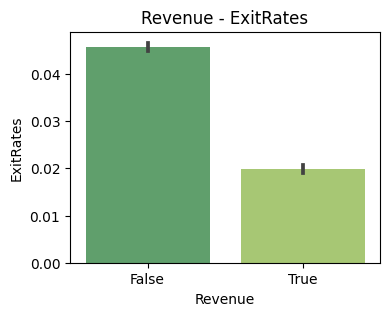

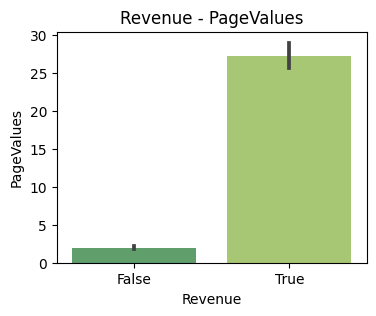

In [24]:
for feature in ga_features:
  plt.figure(figsize=(4,3))
  sns.barplot(x='Revenue', y=feature, data = df, palette='summer')
  plt.title(f'Revenue - {feature}')
  plt.show()

#### Special Day

<Axes: >

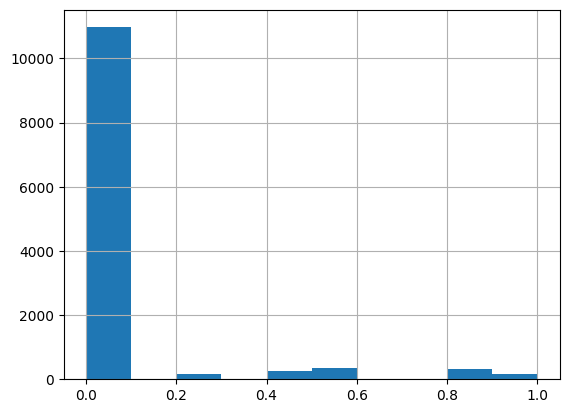

In [25]:
df["SpecialDay"].hist()

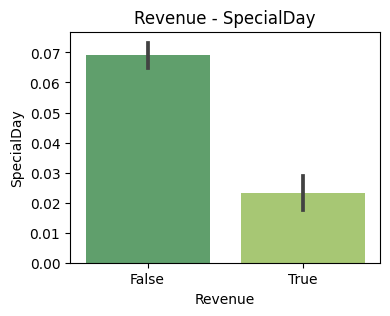

In [26]:
plt.figure(figsize=(4,3))
sns.barplot(x='Revenue', y='SpecialDay', data = df, palette='summer')
plt.title('Revenue - SpecialDay')
plt.show()

#### Other features

In [27]:
df['Month'].value_counts()

May     3316
Nov     2965
Mar     1857
Dec     1696
Oct      545
Sep      446
Aug      431
Jul      429
June     285
Feb      181
aug       70
Name: Month, dtype: int64

In [28]:
df['Month'].replace('aug', 'Aug', inplace=True)

The uneven distribution of data over months can lead to inadequate results (unless this unevenness is caused by natural causes, for example, a decrease in user activity in these months). Moreover, there are no data for January and April.

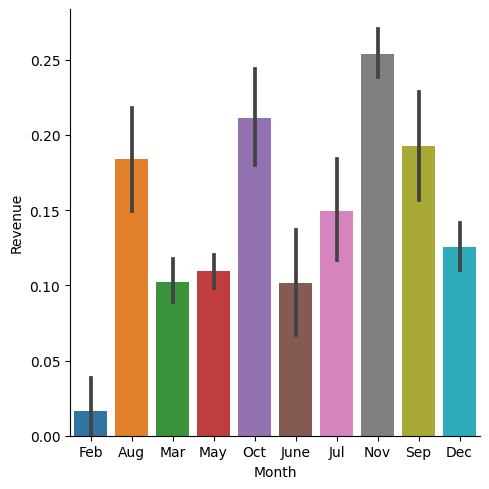

In [29]:
sns.catplot(data=df, x="Month", y="Revenue", kind="bar")

In [30]:
df['OperatingSystems'].value_counts()

2    6547
1    2557
3    2532
4     478
8      75
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

In [31]:
df['Browser'].value_counts()

2     7890
1     2435
4      732
5      465
6      174
10     163
8      135
3      105
13      56
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

In [32]:
df['Region'].value_counts()

1    4722
3    2381
4    1173
2    1131
6     801
7     758
9     505
8     432
5     318
Name: Region, dtype: int64

In [33]:
df['TrafficType'].value_counts()

2     3912
1     2399
3     2017
4     1066
13     728
10     450
6      443
8      343
5      260
11     247
20     193
9       41
7       40
15      37
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64

In [34]:
df['VisitorType'].value_counts()

Returning_Visitor    10446
New_Visitor           1694
Other                   81
Name: VisitorType, dtype: int64

In [35]:
df['Weekend'].value_counts()

False    9360
True     2861
Name: Weekend, dtype: int64

## Correlation analysis and ANOVA

<Axes: >

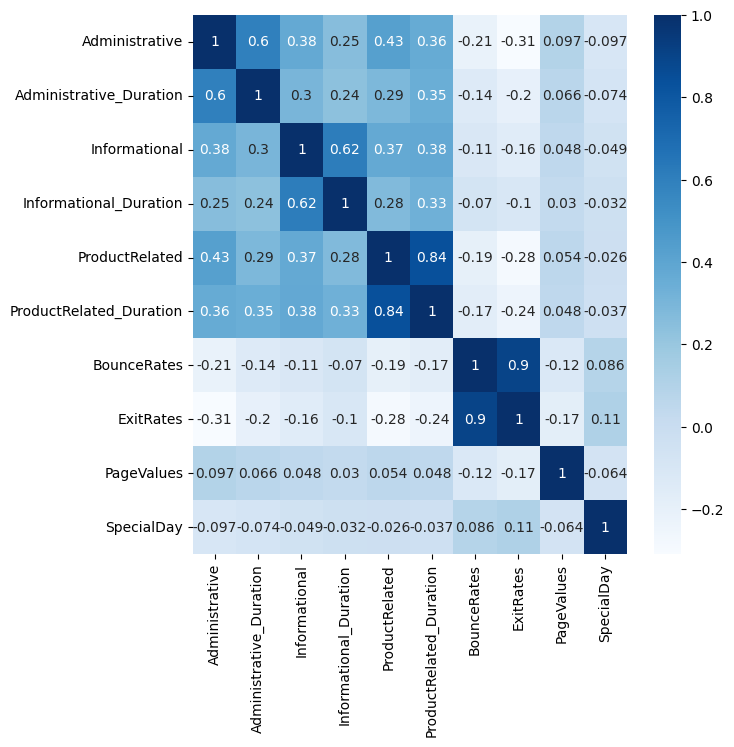

In [36]:
corr = df[sts_features + ga_features + ['SpecialDay']].corr()
plt.figure(figsize=(7,7))
sns.heatmap(corr, cmap="Blues", annot=True)

Strong correlation between `BounceRates` abd `ExitRates` seems logical, considering the meaning of these variables. We can also pay attention to the relatively strong relationship between the first six features. This is a consequence of the connections between the points of contact on the customer journey.

In [37]:
!pip install association-metrics -q

  Preparing metadata (setup.py) ... done


In [38]:
import association_metrics as am

cat_features = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']

df['Weekend'] = df['Weekend'].apply(lambda x: 1 if x == True else 0)
df['Revenue'] = df['Revenue'].apply(lambda x: 1 if x == True else 0)

df_cat = df.apply(lambda x: x.astype("category") if x.name in cat_features else x)

cramersv = am.CramersV(df_cat)

cramersv.fit()

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
Month,1.000000,0.061935,0.069465,0.045622,0.199345,0.137251,0.064912,0.175457
OperatingSystems,0.061935,1.000000,0.594720,0.114603,0.191472,0.453646,0.119875,0.078437
Browser,0.069465,0.594720,1.000000,0.125797,0.189186,0.504222,0.087512,0.048904
Region,0.045622,0.114603,0.125797,1.000000,0.085438,0.174016,0.029911,0.028040
TrafficType,0.199345,0.191472,0.189186,0.085438,1.000000,0.375859,0.150928,0.171864
VisitorType,0.137251,0.453646,0.504222,0.174016,0.375859,1.000000,0.053418,0.103550
Weekend,0.064912,0.119875,0.087512,0.029911,0.150928,0.053418,1.000000,0.027858
Revenue,0.175457,0.078437,0.048904,0.028040,0.171864,0.103550,0.027858,1.000000


The strongest relation is between `Browser` and `OperatingSystems`. It make a sense, since the choice of browser is often based on its compatibility with the OS.

In [39]:
from scipy.stats import f_oneway

Data = []

for c1 in df_cat.columns:
    for c2 in df_cat.columns:
        if df_cat[c1].dtype == 'category' and df_cat[c2].dtype != 'category':
            CategoryGroupLists = df_cat.groupby(c1)[c2].apply(list)
            AnovaResults = f_oneway(*CategoryGroupLists)

            if AnovaResults[1] >= 0.05:
                Data.append({'Category' : c1, 'Numerical' : c2, 'Is correlated' : 'No'})
            else:
                Data.append({'Category' : c1, 'Numerical' : c2, 'Is correlated' : 'Yes'})

AnovaRes = pd.DataFrame.from_dict(Data)
AnovaRes

,Category,Numerical,Is correlated
0,Month,Administrative,Yes
1,Month,Administrative_Duration,Yes
2,Month,Informational,Yes
3,Month,Informational_Duration,Yes
4,Month,ProductRelated,Yes
...,...,...,...
75,Revenue,ProductRelated_Duration,Yes
76,Revenue,BounceRates,Yes
77,Revenue,ExitRates,Yes
78,Revenue,PageValues,Yes


## Target variable

<Axes: >

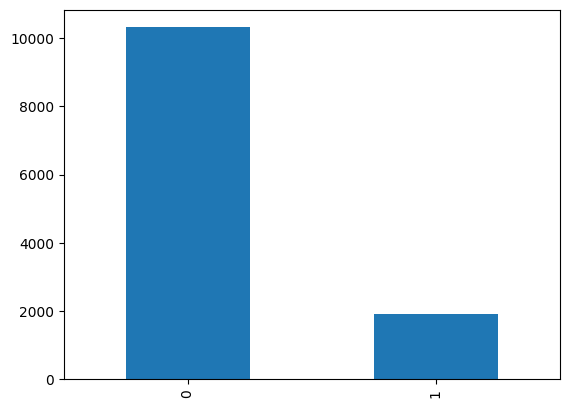

In [40]:
df['Revenue'].value_counts().plot(kind='bar')

The data between the two categories is unevenly distributed. This can negatively affect on the model quality

## Pandas vs. Polars

In [41]:
df_big = df.copy()

for i in range(int(1_000_000/12_000)):
  df_big = pd.concat([df_big, df])

df_big.to_csv("big.csv", index=False)

In [42]:
df_big.shape, df.shape

((1026564, 18), (12221, 18))

In [43]:
!pip install polars

import polars as pl

#### Data importing

In [44]:
# Pandas
%%time

df = pd.read_csv("big.csv")

CPU times: user 2.23 s, sys: 126 ms, total: 2.36 s
Wall time: 3.2 s


In [45]:
# Polars
%%time

df_pl = pl.read_csv("big.csv")

CPU times: user 1.27 s, sys: 253 ms, total: 1.53 s
Wall time: 1.17 s


**Pandas vs. Polars - 0:1**

#### Data filtering

In [46]:
# Pandas
%%time

df.query('Region > 2')

CPU times: user 50.7 ms, sys: 0 ns, total: 50.7 ms
Wall time: 54.8 ms


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
2,0,0.00,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
6,0,0.00,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,0,0
10,0,0.00,0,0.0,3,395.000000,0.000000,0.066667,0.0,0.0,Feb,1,1,3,3,Returning_Visitor,0,0
11,0,0.00,0,0.0,16,407.750000,0.018750,0.025833,0.0,0.4,Feb,1,1,4,3,Returning_Visitor,0,0
14,0,0.00,0,0.0,2,68.000000,0.000000,0.100000,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1026552,0,0.00,0,0.0,6,279.000000,0.000000,0.033333,0.0,0.0,Dec,1,2,3,10,Returning_Visitor,1,0
1026554,0,0.00,0,0.0,8,143.583333,0.014286,0.050000,0.0,0.0,Nov,2,2,3,1,Returning_Visitor,0,0
1026555,0,0.00,0,0.0,6,0.000000,0.200000,0.200000,0.0,0.0,Nov,1,8,4,1,Returning_Visitor,0,0
1026556,6,76.25,0,0.0,22,1075.250000,0.000000,0.004167,0.0,0.0,Dec,2,2,4,2,Returning_Visitor,0,0


In [47]:
# Polars
%%time

df_pl.filter(pl.col('Region') > 2)

CPU times: user 92.3 ms, sys: 48.5 ms, total: 141 ms
Wall time: 111 ms


Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
i64,f64,i64,f64,i64,f64,f64,f64,f64,f64,str,i64,i64,i64,i64,str,i64,i64
0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,"""Feb""",4,1,9,3,"""Returning_Visi…",0,0
0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.4,"""Feb""",2,4,3,3,"""Returning_Visi…",0,0
0,0.0,0,0.0,3,395.0,0.0,0.066667,0.0,0.0,"""Feb""",1,1,3,3,"""Returning_Visi…",0,0
0,0.0,0,0.0,16,407.75,0.01875,0.025833,0.0,0.4,"""Feb""",1,1,4,3,"""Returning_Visi…",0,0
0,0.0,0,0.0,2,68.0,0.0,0.1,0.0,0.0,"""Feb""",3,2,3,3,"""Returning_Visi…",0,0
2,53.0,0,0.0,23,1668.285119,0.008333,0.016313,0.0,0.0,"""Feb""",1,1,9,3,"""Returning_Visi…",0,0
0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,"""Feb""",1,1,4,3,"""Returning_Visi…",0,0
0,0.0,0,0.0,20,2981.166667,0.0,0.01,0.0,0.0,"""Feb""",2,4,4,4,"""Returning_Visi…",0,0
0,0.0,0,0.0,8,136.166667,0.0,0.008333,0.0,1.0,"""Feb""",2,2,5,1,"""Returning_Visi…",1,0


**Pandas vs. Polars - 1:1**

#### Data aggregation

In [48]:
# Pandas
%%time

df.groupby('Revenue').agg({'ProductRelated' : 'mean', 'ExitRates' : 'max'})

CPU times: user 28 ms, sys: 16 µs, total: 28 ms
Wall time: 31.6 ms


,ProductRelated,ExitRates
Revenue,,
0,29.006981,0.2
1,48.210168,0.2


In [49]:
# Polars
%%time

df_pl.groupby('Revenue').agg([pl.mean('ProductRelated'), pl.max('ExitRates')])

CPU times: user 49.4 ms, sys: 52 µs, total: 49.5 ms
Wall time: 97 ms


Revenue,ProductRelated,ExitRates
i64,f64,f64
0,29.006981,0.2
1,48.210168,0.2


**Pandas vs. Polars - 1:2**

## Preprocessing

In [50]:
df_cat.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0


In [51]:
X = df_cat.drop(['Revenue'], axis=1)
y = df_cat['Revenue']

#### Categorical features encoding

Let's encode categorical features using OHE

In [52]:
# Month
one_hot = pd.get_dummies(X['Month'], prefix='Month')
X.drop(columns=['Month'], axis=1, inplace=True)
one_hot.drop(one_hot.columns[0], axis=1, inplace=True)
X = X.join(one_hot)

In [53]:
# OperatingSystems
one_hot = pd.get_dummies(X['OperatingSystems'], prefix='OperatingSystems')
X.drop(columns=['OperatingSystems'], axis=1, inplace=True)
one_hot.drop(one_hot.columns[0], axis=1, inplace=True)
X = X.join(one_hot)

In [54]:
# Browser
one_hot = pd.get_dummies(X['Browser'], prefix='Browser')
X.drop(columns=['Browser'], axis=1, inplace=True)
one_hot.drop(one_hot.columns[0], axis=1, inplace=True)
X = X.join(one_hot)

In [55]:
# Region
one_hot = pd.get_dummies(X['Region'], prefix='Region')
X.drop(columns=['Region'], axis=1, inplace=True)
one_hot.drop(one_hot.columns[0], axis=1, inplace=True)
X = X.join(one_hot)

In [56]:
# TrafficType
one_hot = pd.get_dummies(X['TrafficType'], prefix='TrafficType')
X.drop(columns=['TrafficType'], axis=1, inplace=True)
one_hot.drop(one_hot.columns[0], axis=1, inplace=True)
X = X.join(one_hot)

In [57]:
# VisitorType
one_hot = pd.get_dummies(X['VisitorType'], prefix='VisitorType')
X.drop(columns=['VisitorType'], axis=1, inplace=True)
one_hot.drop(one_hot.columns[0], axis=1, inplace=True)
X = X.join(one_hot)

#### Scaling

Before scaling we have to split data on train and test

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Let's try to use MinMaxScaler for scaling

In [59]:
from sklearn.preprocessing import MinMaxScaler

ss = MinMaxScaler()
ss.fit(X_train)

X_train = pd.DataFrame(ss.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(ss.transform(X_test), columns=X_test.columns)

In [60]:
X_train.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_Other,VisitorType_Returning_Visitor
0,0.000000,0.000000,0.000000,0.000000,0.034043,0.009345,0.041667,0.104167,0.000000,0.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.038462,0.027657,0.000000,0.000000,0.076596,0.018928,0.027273,0.043357,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.076923,0.033836,0.208333,0.059492,0.029787,0.032525,0.059524,0.225962,0.056461,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.230769,0.050337,0.000000,0.000000,0.039716,0.014886,0.000000,0.066667,0.144363,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.307692,0.045973,0.000000,0.000000,0.068085,0.023152,0.018868,0.040881,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Naive Bayes classifier

Let's train **Naive Bayes classifier** on numerical features firstly and then evaluate its quality. We need to split data again, but without categorical columns

In [109]:
X_num = df_cat.drop(['Revenue'] + cat_features, axis=1)

X_train_num, X_test_num, _, _ = train_test_split(X_num, y, test_size=0.25, random_state=42) # As random state is equal to base splitting, we can use y_train and y_test in this case

Then, scaling feature matrices with no cat-columns using MinMaxScaler

In [110]:
ss.fit(X_train_num)

X_train_num = pd.DataFrame(ss.transform(X_train_num), columns=X_train_num.columns)
X_test_num = pd.DataFrame(ss.transform(X_test_num), columns=X_test_num.columns)

MinMaxScaler()

In [111]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gnb = GaussianNB()
gnb.fit(X_train_num, y_train)

pred_gnb = gnb.predict(X_test_num)


round(accuracy_score(y_test, pred_gnb), 3)

GaussianNB()

0.822

We've got quite good accuracy score. Let's look at confusion matrix, precision and recall

In [112]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred_gnb)

array([[2208,  375],
       [ 168,  305]])

In [113]:
from sklearn.metrics import precision_score, recall_score

round(precision_score(y_test, pred_gnb), 3), round(recall_score(y_test, pred_gnb), 3)

(0.449, 0.645)

We can see that there is no bend neither to high precision nor to high recall

## KNN classifier

#### With numerical features only

Now, let's train **k-neighbors classifier** on numerical features and evaluate its quality

In [114]:
from sklearn.neighbors import KNeighborsClassifier

knn_cl = KNeighborsClassifier()
knn_cl.fit(X_train_num, y_train)

pred_knn = knn_cl.predict(X_test_num)


round(accuracy_score(y_test, pred_knn), 3)

KNeighborsClassifier()

0.884

The accuracy of the model seems to be good and it's better than accuracy of NB classifier. But let's look at the confusion matrix values

In [115]:
confusion_matrix(y_test, pred_knn)

array([[2500,   83],
       [ 273,  200]])

In [116]:
round(precision_score(y_test, pred_knn), 3), round(recall_score(y_test, pred_knn), 3)

(0.707, 0.423)

Here precision is higher and recall is lower than in a NB classifier

In [117]:
from sklearn.model_selection import cross_val_score

round(cross_val_score(knn_cl, X_train_num, y_train, scoring='accuracy', cv=3, n_jobs=-1).mean(), 3)

0.88

The accuracy estimated by cross validation is a bit lower than estimation on our train-test split, but close enough

Let's try to find optimal hyper-parameter combination using grid search

In [118]:
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors' : np.arange(2, 20, 2),
          'weights' : ['uniform', 'distance'],
          'p' : [1, 2]}

gs_knn = GridSearchCV(KNeighborsClassifier(), params, scoring='accuracy', cv=3, n_jobs=-1, verbose=2)
gs_knn.fit(X_train_num, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=2)

In [119]:
gs_knn.best_score_, gs_knn.best_params_

(0.886088379705401, {'n_neighbors': 12, 'p': 2, 'weights': 'distance'})

In [120]:
pred_gs_knn = gs_knn.best_estimator_.predict(X_test_num)

round(accuracy_score(y_test, pred_gs_knn), 3)

0.883

With using of optimal hyper-parameters in KNN classifier we've got a bit lower accuracy on test

In [121]:
round(precision_score(y_test, pred_gs_knn), 3), round(recall_score(y_test, pred_gs_knn), 3)

(0.718, 0.397)

Precision and recall also have no changed to much

#### With categorical features

Next, let's train k-neighbors classifier on **all features**

In [122]:
knn_cl.fit(X_train, y_train)

pred_knn = knn_cl.predict(X_test)

round(accuracy_score(y_test, pred_knn), 3)

KNeighborsClassifier()

0.84

With categorical variables the accuracy score is lower

In [123]:
confusion_matrix(y_test, pred_knn)

array([[2497,   86],
       [ 404,   69]])

In [124]:
round(precision_score(y_test, pred_knn), 3), round(recall_score(y_test, pred_knn), 3)

(0.445, 0.146)

Recall is rather lower and there is lots of false-negative predictions. It raises doubts about the quality of the model

In [125]:
round(cross_val_score(knn_cl, X_train, y_train, scoring='accuracy', cv=3, n_jobs=-1).mean(), 3)

0.834

The accuracy estimated by cross validation is a bit lower than estimation on our train-test split, but close enough

Let's try to find optimal hyper-parameter combination using grid search

In [126]:
gs_knn.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=2)

In [127]:
gs_knn.best_score_, gs_knn.best_params_

(0.8451718494271686, {'n_neighbors': 10, 'p': 2, 'weights': 'uniform'})

In [128]:
pred_gs_knn = gs_knn.best_estimator_.predict(X_test)

round(accuracy_score(y_test, pred_gs_knn), 3)

0.848

The model accuracy has not changed too much

In [129]:
confusion_matrix(y_test, pred_gs_knn)

array([[2570,   13],
       [ 451,   22]])

In [130]:
round(precision_score(y_test, pred_gs_knn), 3), round(recall_score(y_test, pred_gs_knn), 3)

(0.629, 0.047)

Precision has become even greater. As a recall is quite small, the use of the model can be approved by stakeholders is some cases

## Logistic regression

Let's try to briefly watch how logistic regression will be fit for this task

In [83]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

pred_lr = lr.predict(X_test)

round(accuracy_score(y_test, pred_lr), 3)

0.87

In [86]:
round(cross_val_score(lr, X, y, scoring='accuracy', cv=3, n_jobs=-1).mean(), 3)

0.881

Accuracy is rather better than on KNN model with categorical features

In [84]:
confusion_matrix(y_test, pred_lr)

array([[2540,   43],
       [ 353,  120]])

In [85]:
round(precision_score(y_test, pred_lr), 3), round(recall_score(y_test, pred_lr), 3)

(0.736, 0.254)

In [87]:
importances = pd.DataFrame({'weights': lr.coef_[0], 'features': X_train.columns}).sort_values(by='weights')
importances

,weights,features
7,-3.465951,ExitRates
12,-1.428247,Month_Feb
66,-0.886963,VisitorType_Other
60,-0.835483,TrafficType_15
31,-0.754061,Browser_6
...,...,...
2,1.030622,Informational
4,1.108625,ProductRelated
37,1.202766,Browser_12
5,1.522764,ProductRelated_Duration


here we can see the features that are affecting the most on buying decision (with both signs). It should be noted that `PageValues` has an abnormally large influence in comparison with the rest features

## Explainer Dashboard

Next, we're going to build Explainer Dashboard and make some conclusions

In [90]:
!pip install explainerdashboard -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.9/286.9 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.6/220.6 kB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 95.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 51.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.5/136.5 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 72.1 MB/s eta 0:00:00


In [91]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

In [92]:
from explainerdashboard import ClassifierExplainer

explainer = ClassifierExplainer(gs_knn.best_estimator_, X_test.iloc[:1000], y_test.iloc[:1000])

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


Note: shap values for shap='kernel' normally get calculated against X_background, but paramater X_background=None, so setting X_background=shap.sample(X, 50)...
Generating self.shap_explainer = shap.KernelExplainer(model, X, link='identity')


In [96]:
from explainerdashboard import ExplainerDashboard

db = ExplainerDashboard(explainer)

Building ExplainerDashboard..
Detected google colab environment, setting mode='external'
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...


/usr/local/lib/python3.10/dist-packages/dash/dash.py:516: UserWarning: JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.


  0%|          | 0/1000 [00:00<?, ?it/s]

Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating predictions...
Calculating pred_percentiles...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...


In [97]:
db.run()

Starting ExplainerDashboard on http://172.28.0.12:8050
You can terminate the dashboard with ExplainerDashboard.terminate(8050)
Dash app running on:


<IPython.core.display.Javascript object>

With using of SHAP values we can see that one of the most influencing features are `PageValues` and `ExitRates` (as in LR importances)

With 0.5 cutoff prediction probability results are: accuracy - 0.837, precision - 0.583, recall- 0.042. So, our classifier is good in forecasting and as a precision is high we can trust these estiomations. But, having a low recall, we are missing some positive cases and it's can be the reason to dismiss KNN model

If we try to look at individual predictions, for example, for an observation with index 196, the probability of a positive class is 40%. This probability was positively influenced by `Administrative`, `TrafficType` equaled 2 and `ExitRates`.
Another example is an observation with index 367. It takes a negative class with 100% probability, first of all because `TrafficType` equals 3 and `Month` equals March